In [1]:
from emojify.nn_manager import NNManager
from emojify.first_data import load_sentiment_data
import emojify.example_net as example_net
import torch
import emojify.utils as utils
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\ugioh\code\emojify\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


20000
ExampleNet(
  (word_embeddings): Embedding(17097, 128)
  (relu): ReLU()
  (lstm): LSTM(1024, 128, num_layers=2, batch_first=True)
  (linear1): Linear(in_features=128, out_features=512, bias=True)
  (hidden2tag): Linear(in_features=512, out_features=6, bias=True)
)
---- Epoch 1 of 10 ----


 54%|█████▍    | 543/1000 [00:01<00:01, 265.74it/s]

Epoch: 0, Batches per seconds: 282.90, Global step:    500, Validation Loss: 1.79, Validation Accuracy: 0.191


100%|██████████| 1000/1000 [00:03<00:00, 292.09it/s]


Epoch: 0, Batches per seconds: 294.41, Global step:   1000, Validation Loss: 1.79, Validation Accuracy: 0.307
---- Epoch 2 of 10 ----


 52%|█████▎    | 525/1000 [00:01<00:01, 256.66it/s]

Epoch: 1, Batches per seconds: 304.70, Global step:   1500, Validation Loss: 1.78, Validation Accuracy: 0.353


100%|██████████| 1000/1000 [00:03<00:00, 329.93it/s]


Epoch: 1, Batches per seconds: 311.20, Global step:   2000, Validation Loss: 1.76, Validation Accuracy: 0.353
---- Epoch 3 of 10 ----


 53%|█████▎    | 527/1000 [00:01<00:02, 233.12it/s]

Epoch: 2, Batches per seconds: 313.02, Global step:   2500, Validation Loss: 1.75, Validation Accuracy: 0.353


100%|██████████| 1000/1000 [00:03<00:00, 316.77it/s]


Epoch: 2, Batches per seconds: 312.84, Global step:   3000, Validation Loss: 1.74, Validation Accuracy: 0.353
---- Epoch 4 of 10 ----


 53%|█████▎    | 532/1000 [00:01<00:01, 255.13it/s]

Epoch: 3, Batches per seconds: 315.24, Global step:   3500, Validation Loss: 1.74, Validation Accuracy: 0.353


100%|██████████| 1000/1000 [00:03<00:00, 326.78it/s]


Epoch: 3, Batches per seconds: 316.16, Global step:   4000, Validation Loss: 1.73, Validation Accuracy: 0.353
---- Epoch 5 of 10 ----


 52%|█████▏    | 518/1000 [00:01<00:01, 250.26it/s]

Epoch: 4, Batches per seconds: 316.18, Global step:   4500, Validation Loss: 1.72, Validation Accuracy: 0.353


100%|██████████| 1000/1000 [00:03<00:00, 322.41it/s]


Epoch: 4, Batches per seconds: 317.41, Global step:   5000, Validation Loss: 1.72, Validation Accuracy: 0.353
---- Epoch 6 of 10 ----


 53%|█████▎    | 530/1000 [00:01<00:01, 240.78it/s]

Epoch: 5, Batches per seconds: 318.39, Global step:   5500, Validation Loss: 1.71, Validation Accuracy: 0.353


100%|██████████| 1000/1000 [00:03<00:00, 326.97it/s]


Epoch: 5, Batches per seconds: 318.86, Global step:   6000, Validation Loss: 1.71, Validation Accuracy: 0.353
---- Epoch 7 of 10 ----


 53%|█████▎    | 531/1000 [00:01<00:01, 250.94it/s]

Epoch: 6, Batches per seconds: 319.51, Global step:   6500, Validation Loss: 1.71, Validation Accuracy: 0.353


100%|██████████| 1000/1000 [00:03<00:00, 322.87it/s]


Epoch: 6, Batches per seconds: 319.42, Global step:   7000, Validation Loss: 1.70, Validation Accuracy: 0.353
---- Epoch 8 of 10 ----


 52%|█████▏    | 521/1000 [00:01<00:01, 251.04it/s]

Epoch: 7, Batches per seconds: 319.65, Global step:   7500, Validation Loss: 1.70, Validation Accuracy: 0.353


100%|██████████| 1000/1000 [00:03<00:00, 328.14it/s]


Epoch: 7, Batches per seconds: 320.47, Global step:   8000, Validation Loss: 1.70, Validation Accuracy: 0.353
---- Epoch 9 of 10 ----


 52%|█████▎    | 525/1000 [00:01<00:01, 245.34it/s]

Epoch: 8, Batches per seconds: 320.65, Global step:   8500, Validation Loss: 1.70, Validation Accuracy: 0.353


100%|██████████| 1000/1000 [00:03<00:00, 324.05it/s]


Epoch: 8, Batches per seconds: 320.82, Global step:   9000, Validation Loss: 1.70, Validation Accuracy: 0.353
---- Epoch 10 of 10 ----


 55%|█████▌    | 552/1000 [00:01<00:01, 273.69it/s]

Epoch: 9, Batches per seconds: 320.59, Global step:   9500, Validation Loss: 1.70, Validation Accuracy: 0.353


100%|██████████| 1000/1000 [00:03<00:00, 322.31it/s]

Epoch: 9, Batches per seconds: 320.91, Global step:  10000, Validation Loss: 1.70, Validation Accuracy: 0.353


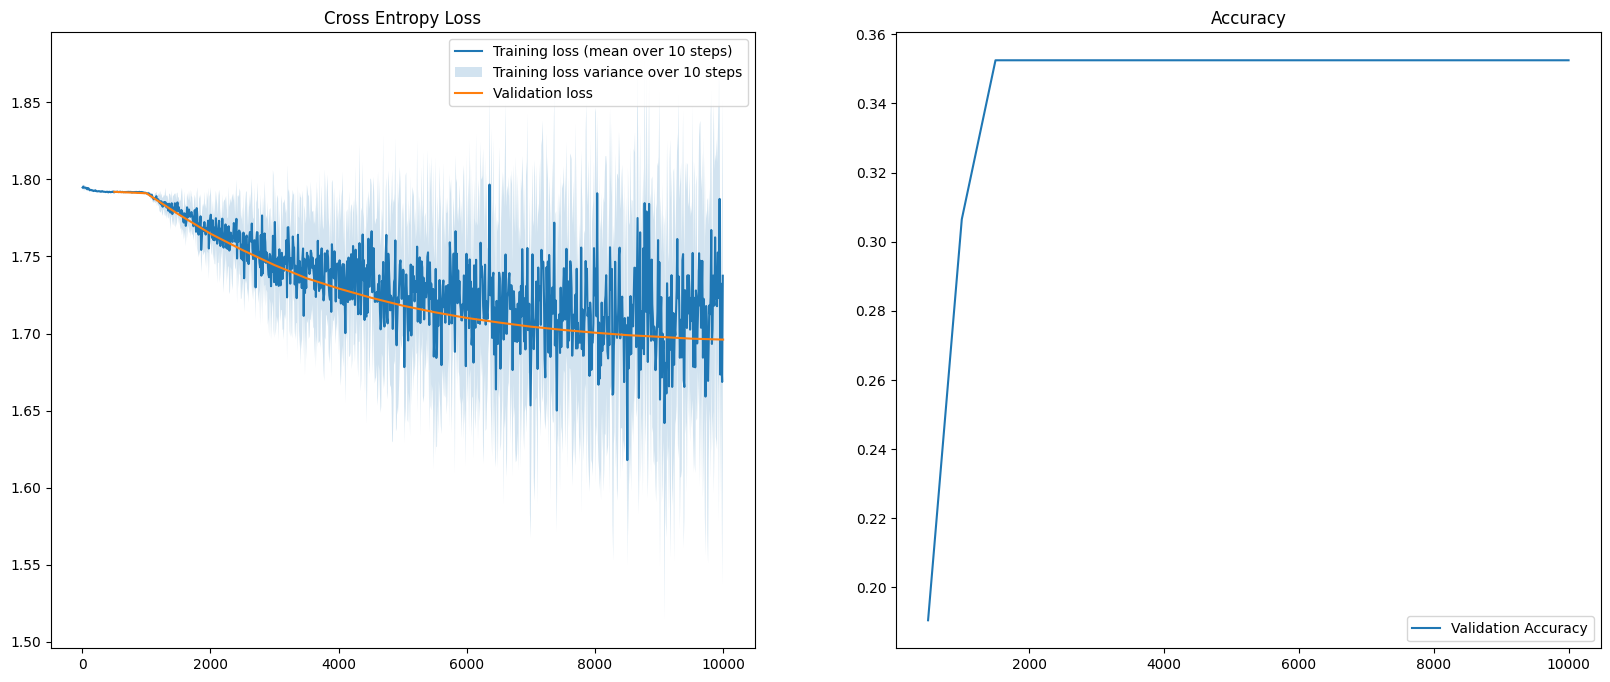

In [2]:
# Set the random generator seed (parameters, shuffling etc).
# You can try to change this and check if you still get the same result!
utils.set_seed(0)
embedding_dim = 8  # should probably be 32
hidden_dim = 128  # should probably be 32
epochs = 10
batch_size = 16
learning_rate = 5e-3
early_stop_count = 4
train, val, test, word_to_idx, label_to_idx = load_sentiment_data(
    batch_size, embedding_dim
)
model = example_net.ExampleNet(
    batch_size,
    embedding_dim,
    hidden_dim,
    vocab_size=len(word_to_idx),
    label_count=len(label_to_idx),
)
trainer = NNManager(
    batch_size=batch_size,
    learning_rate=learning_rate,
    early_stop_count=early_stop_count,
    epochs=epochs,
    model=model,
    dataloaders=(train, val, test),
)
trainer.train()

In [3]:
accuracy = trainer.test()
accuracy

100%|██████████| 125/125 [00:00<00:00, 1046.92it/s]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       581
           1       0.35      1.00      0.51       693
           2       0.00      0.00      0.00       227
           3       0.00      0.00      0.00       290
           4       0.00      0.00      0.00       132
           5       0.00      0.00      0.00        77

    accuracy                           0.35      2000
   macro avg       0.06      0.17      0.09      2000
weighted avg       0.12      0.35      0.18      2000




c:\Users\ugioh\code\emojify\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ugioh\code\emojify\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ugioh\code\emojify\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3465